In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

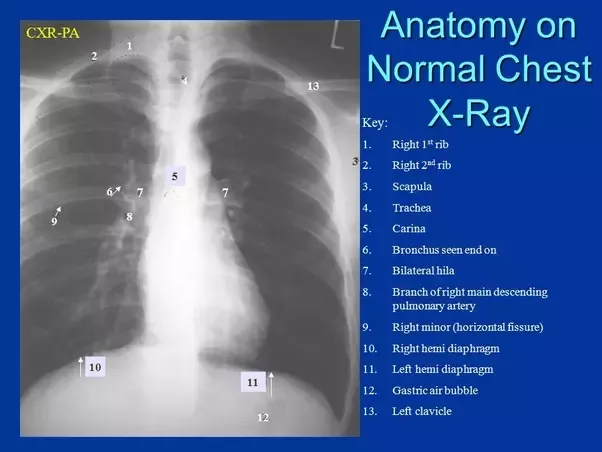

## Problem Statement

we are identifying and localizing COVID-19 abnormalities on chest radiographs. This is an object detection and classification problem.

## Libraries

In [ ]:
import plotly.express as px
import glob
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import cv2
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
import ast

In [ ]:
train_data = pd.read_csv("/kaggle/input/siim-covid19-detection/train_study_level.csv")
train_image = pd.read_csv("/kaggle/input/siim-covid19-detection/train_image_level.csv")
print(f"Total ID  from the Training set : {train_data.shape[0]}")
print(f"Total Images from the Training set : {train_image.shape[0]}")

In [ ]:
train_data = pd.read_csv("/kaggle/input/siim-covid19-detection/train_study_level.csv")
train_data.head()

In [ ]:
whole_spread = train_data[["Negative for Pneumonia",'Typical Appearance','Indeterminate Appearance','Atypical Appearance']].sum()
cols = ["Negative for Pneumonia",'Typical Appearance','Indeterminate Appearance','Atypical Appearance']
values = []
for col in cols:
    values.append(whole_spread[col])
sp = pd.DataFrame()
sp['labels'] = cols
sp['counts'] = values
fig = px.pie(sp, names = 'labels', values = 'counts', title = 'Disease Distribution')
fig.show()

In [ ]:
np_count = train_data.groupby(['Negative for Pneumonia'])['Negative for Pneumonia'].count().reset_index(name = 'Counts')
np_count['Negative for Pneumonia'] = np_count['Negative for Pneumonia'].map({0:'No',1:'Yes'})
fig = px.pie(np_count, values = 'Counts', names = 'Negative for Pneumonia', title = 'Negative for Pneumonia Spread')
fig.show()

In [ ]:
np_count = train_data.groupby(['Typical Appearance'])['Typical Appearance'].count().reset_index(name = 'Counts')
np_count['Typical Appearance'] = np_count['Typical Appearance'].map({0:'No',1:'Yes'})
fig = px.pie(np_count, values = 'Counts', names = 'Typical Appearance', title = 'Typical Appearance Spread')
fig.show()

In [ ]:
np_count = train_data.groupby(['Indeterminate Appearance'])['Indeterminate Appearance'].count().reset_index(name = 'Counts')
np_count['Indeterminate Appearance'] = np_count['Indeterminate Appearance'].map({0:'No',1:'Yes'})
fig = px.pie(np_count, values = 'Counts', names = 'Indeterminate Appearance', title = 'Indeterminate Appearance Spread')
fig.show()

In [ ]:
np_count = train_data.groupby(['Atypical Appearance'])['Atypical Appearance'].count().reset_index(name = 'Counts')
np_count['Atypical Appearance'] = np_count['Atypical Appearance'].map({0:'No',1:'Yes'})
fig = px.pie(np_count, values = 'Counts', names = 'Atypical Appearance', title = 'Atypical Appearance Spread')
fig.show()

In [ ]:
train_image.head()

In [ ]:
np_5 = train_data[train_data['Negative for Pneumonia'] ==1].head(10)
np_name = np_5.id.str.replace('_study','')

## Sample Image - Negative for Pneumonia

In [ ]:
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+np_name[2]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+np_name[3]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()
    
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+np_name[5]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+np_name[11]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+np_name[12]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

## Sample Image - Typical Appearance

In [ ]:
ta_5 = train_data[train_data['Typical Appearance'] ==1].head(10)
ta_name = ta_5.id.str.replace('_study','')

In [ ]:
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ta_name[0]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ta_name[9]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()
    
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ta_name[10]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ta_name[20]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ta_name[22]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

## Sample Image - Indeterminate Appearance

In [ ]:
ia_5 = train_data[train_data['Indeterminate Appearance'] ==1].head(10)
ia_name = ia_5.id.str.replace('_study','')
ia_name

In [ ]:
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ia_name[8]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ia_name[13]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()
    
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ia_name[24]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ia_name[25]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+ia_name[26]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

## Sample Image - Atypical Appearance

In [ ]:
aa_5 = train_data[train_data['Atypical Appearance'] ==1].head(10)
aa_name = aa_5.id.str.replace('_study','')
aa_name

In [ ]:
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[1]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[4]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()
    
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[16]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[40]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[45]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(f_name)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

## Image Tagging

In [ ]:
train_data['StudyInstanceUID'] = train_data.id.str.replace("_study",'')
combine = pd.merge(train_data, train_image, on = 'StudyInstanceUID')
combine.head(10)

In [ ]:
combine['label_name'] = combine['label'].apply(lambda x: x.split()[0])
label_counts = combine.groupby('label_name')['label_name'].count().reset_index(name = 'counts')
fig = px.pie(label_counts, values = 'counts', names ='label_name' , title = "Label Distribution")
fig.show()

## Sample Box Coordinates

In [ ]:
uid_list = combine.loc[combine.boxes.notna(), 'StudyInstanceUID']

def get_coordinates(uid):
    print(uid)
    cor = combine[combine['StudyInstanceUID'] == uid]['boxes'].values
    if(type(cor[0]) is not float):
        dict_s = ast.literal_eval(cor[0])
        for di in dict_s:
            print(di)

for nn in uid_list[:10]:
    get_coordinates(nn)

There are multiple bounding boxes to an image.

In [ ]:
from pydicom.pixel_data_handlers.util import apply_voi_lut
from PIL import Image
voi_lut = True
fix_monochrome = True
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/00086460a852/*/*.dcm'): #, recursive=True
    ds = pydicom.read_file(f_name,1)
    print(f_name)
    #img = ds.pixel_array # get image array
    if voi_lut:
        data = apply_voi_lut(ds.pixel_array, ds)
    else:
        data = ds.pixel_array
    if fix_monochrome and ds.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    im = Image.fromarray(data)
    im.save('/kaggle/working/65761e66de9f.jpg')
    plt.show()

In [ ]:
from IPython.display import Image
#Image(filename='/kaggle/working/65761e66de9f.jpg') 

In [ ]:
img = matplotlib.image.imread("/kaggle/working/65761e66de9f.jpg")
figure, ax = plt.subplots(1)
rect = patches.Rectangle((720,636),332,648, edgecolor='r', facecolor="none")
rect1 = patches.Rectangle((2044,847),329,576, edgecolor='r', facecolor="none")
ax.imshow(img)
ax.add_patch(rect)
ax.add_patch(rect1)

In [ ]:
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[1]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(ds.pixel_array.shape)

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[4]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(ds.pixel_array.shape)
    
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[16]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(ds.pixel_array.shape)

for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[40]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(ds.pixel_array.shape)
    
for f_name in glob.iglob('/kaggle/input/siim-covid19-detection/train/'+aa_name[45]+'/*/*.dcm'): #, recursive=True
    ds = pydicom.dcmread(f_name)
    print(ds.pixel_array.shape)